In [124]:
import numpy as np
import pandas as pd

from sklearn.svm import SVR
import os
from sys import platform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import ExtraTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
import h2o
from h2o.automl import H2OAutoML


import warnings
warnings.filterwarnings('ignore')

In [125]:
#Some configuration for matplotlib and seaborn to look pretty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (18.,9.)})
sns.set_style("whitegrid")
SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Instructions

1. Load the `train.csv` file
2. Explore the data, understand it
3. Process it for future training
4. Do train, test, split for your `train.csv` file
5. `fit/train` a model from your cleaned_train_df
-----
5. Load the `train.csv` file
6. Apply the same processing you did to `train.csv` into `test.csv`
7. `predict` the price for that file
8. Only keep the columns you need
9. Export
-----
10. Repeat! 🚀🔥

# Import the csv files

In [126]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [127]:
print(df_train.shape[0])
df_train.sample()

40455


,id,carat,cut,color,clarity,depth,table,x,y,z,price
3044,3044,2.0,Good,E,SI2,64.7,57.0,7.75,7.86,5.05,9.642


In [128]:
print(df_test.shape[0])
df_test.sample()

13485


,id,carat,cut,color,clarity,depth,table,x,y,z
1350,1350,1.23,Ideal,F,VVS2,63.0,55.0,6.89,6.79,4.31


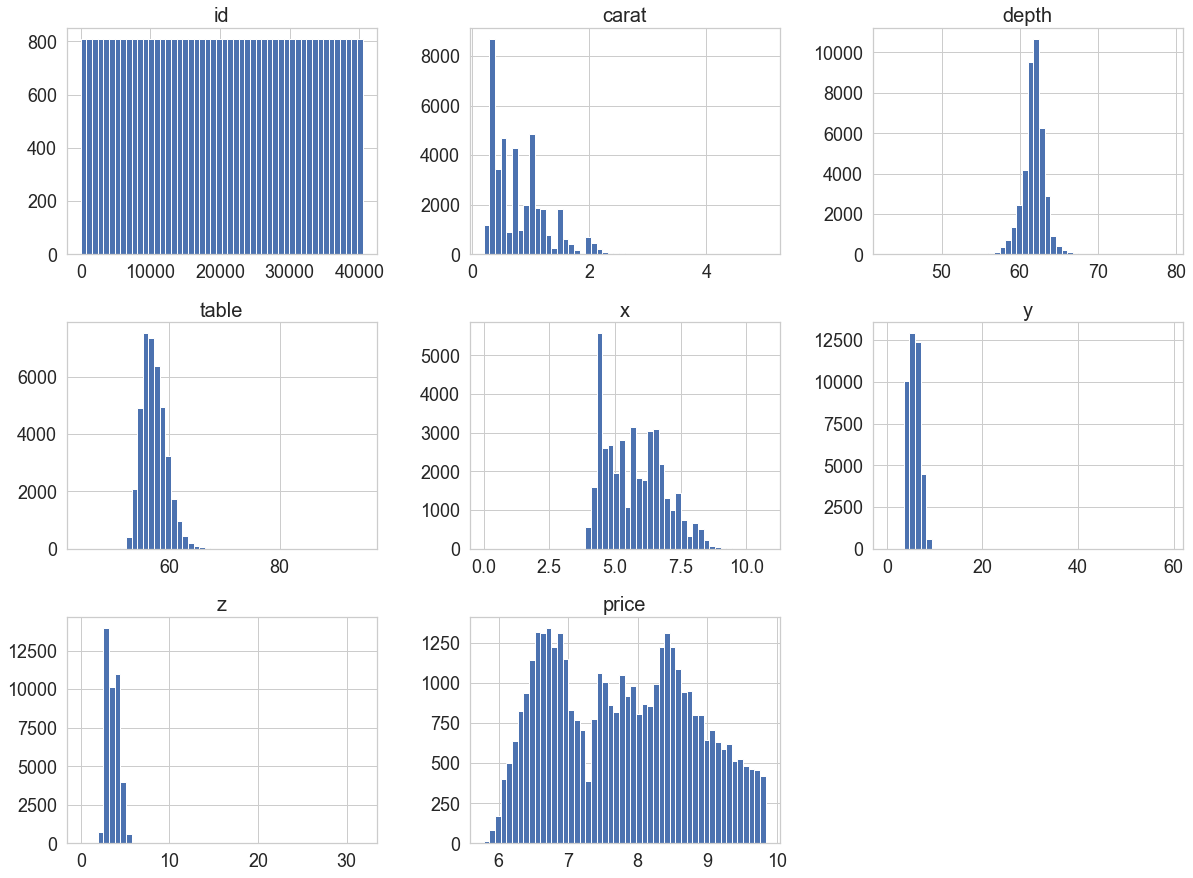

In [129]:
df_train.hist(bins = 50, figsize = (20, 15))
plt.show()

<AxesSubplot:title={'center':'Correlation Heatmap'}>

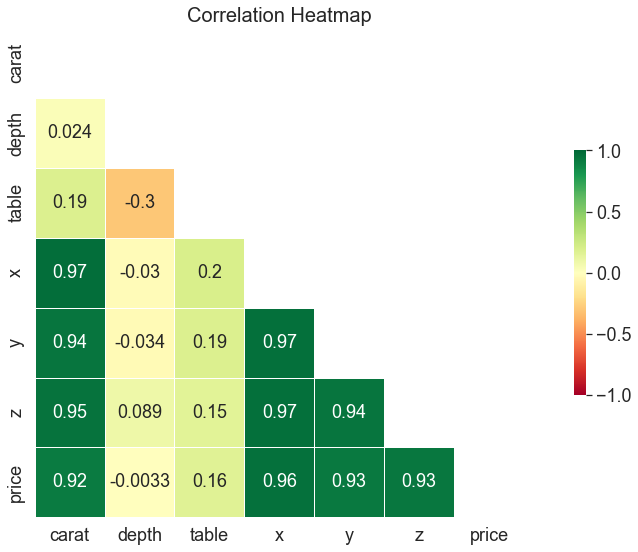

In [19]:
# Your response here. 
#Finding correlations within the df

#Set the variables
corrmat = df_train.drop(columns='id').corr()       
mask = np.triu(np.ones_like(corrmat, dtype=bool)) 
top_corr_features = corrmat.index
plt.title("Correlation Heatmap")

#Plot the heatmap
sns.heatmap(corrmat,  
            mask = mask,
            cmap='RdYlGn',
            square=True, 
            linewidth=0.5, 
            annot = True,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5})

In [130]:
df_train.cut.value_counts()

Ideal        16230
Premium      10338
Very Good     9003
Good          3682
Fair          1202
Name: cut, dtype: int64

In [131]:
dict_cut = {
    'Ideal': 5,
    'Premium': 4,
    'Very Good': 3,
    'Good': 2,
    'Fair': 1
    }

In [132]:
df_train.cut = df_train.cut.map(dict_cut) # Map on pandas is different form map in python
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
24252,24252,0.3,5,H,VS2,62.5,57.0,4.26,4.29,2.67,6.196


In [133]:
df_train.color.value_counts()

G    8410
E    7368
F    7182
H    6203
D    5100
I    4070
J    2122
Name: color, dtype: int64

In [134]:
dict_color = {
    'D': 7,
    'E': 6,
    'F': 5,
    'G': 4,
    'H': 3,
    'I': 2,
    'J': 1
    }

In [135]:
df_train.color = df_train.color.map(dict_color) # Map on pandas is different form map in python
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
25187,25187,1.2,5,4,VVS1,61.2,56.0,6.89,6.86,4.21,9.166


In [136]:
df_train.clarity.value_counts()

SI1     9779
VS2     9259
SI2     6921
VS1     6079
VVS2    3745
VVS1    2807
IF      1312
I1       553
Name: clarity, dtype: int64

In [137]:
dict_clarity = {
    'IF': 8,
    'VVS1': 7,
    'VVS2': 6,
    'VS1': 5,
    'VS2': 4,
    'SI1': 3,
    'SI2': 2,
    'I1': 1
    }

In [138]:
df_train.clarity = df_train.clarity.map(dict_clarity) # Map on pandas is different form map in python
df_train.sample()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
1070,1070,0.41,5,4,4,62.4,54.0,4.81,4.78,2.99,6.967


<AxesSubplot:title={'center':'Correlation Heatmap'}>

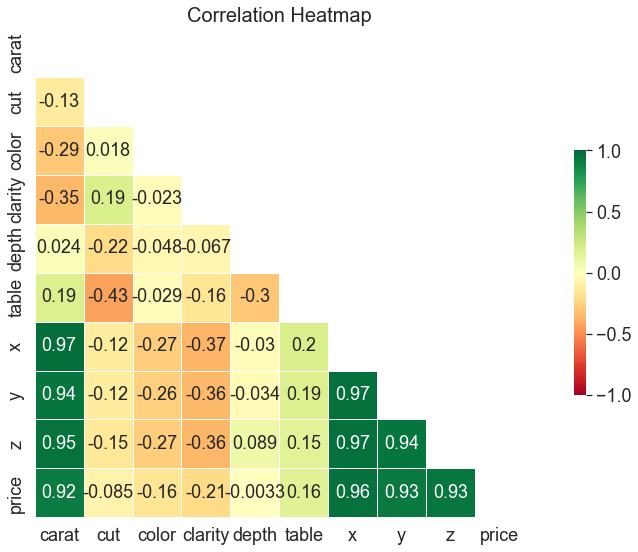

In [139]:
# Your response here. 
#Finding correlations within the df

#Set the variables
corrmat = df_train.drop(columns='id').corr()       
mask = np.triu(np.ones_like(corrmat, dtype=bool)) 
top_corr_features = corrmat.index
plt.title("Correlation Heatmap")

#Plot the heatmap
sns.heatmap(corrmat,  
            mask = mask,
            cmap='RdYlGn',
            square=True, 
            linewidth=0.5, 
            annot = True,
            vmax=1,
            vmin=-1,
            cbar_kws={"shrink": .5})

In [140]:
# x,y,z represent the size of the diamond which have high correlation among
df_train.drop(columns=['x','y','z'], inplace=True)

<AxesSubplot:xlabel='carat', ylabel='Count'>

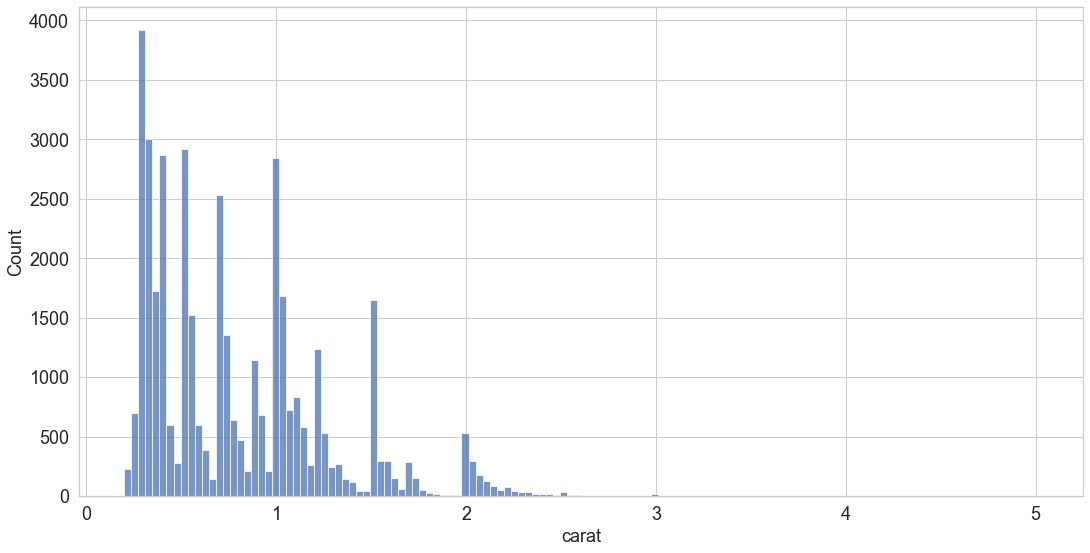

In [141]:
sns.histplot(df_train.carat)

<AxesSubplot:xlabel='carat'>

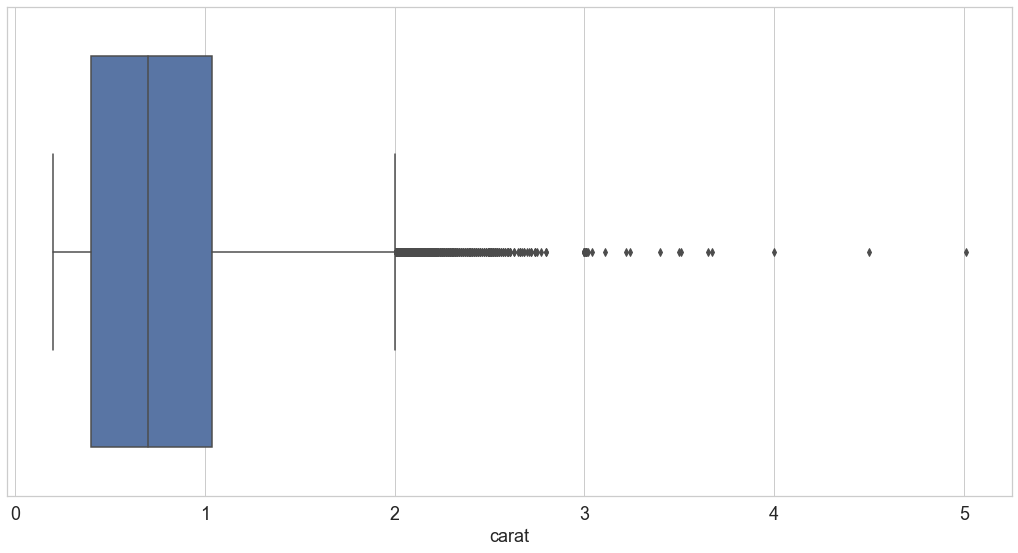

In [142]:
sns.boxplot(df_train.carat)

<AxesSubplot:xlabel='carat'>

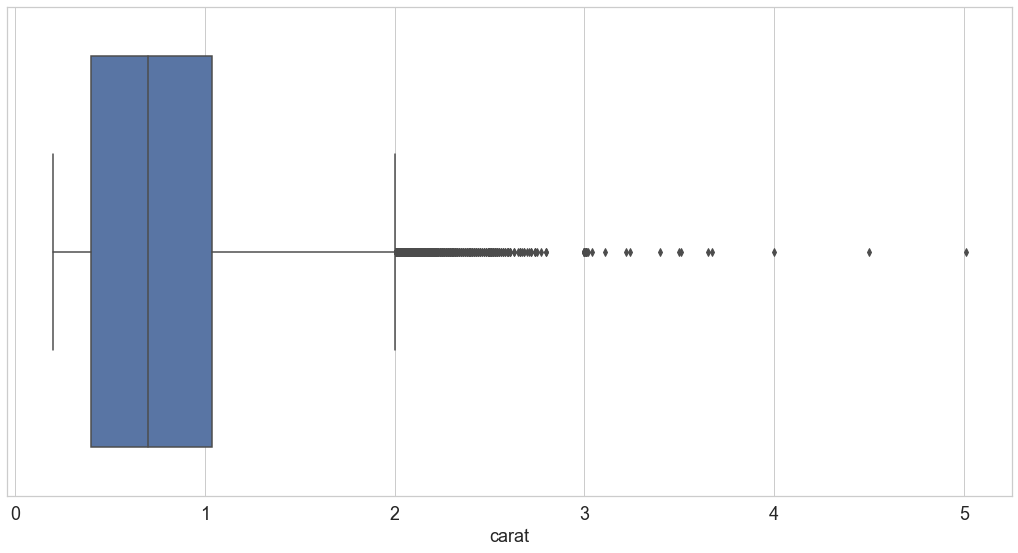

In [143]:
# It looks ok now
sns.boxplot(df_train.carat)

In [144]:
#Dropping the outliers. Carat >=2"
df_train = df_train[df_train["carat"]<=2]


# Cleaning, processing, feature selection, etc

In [145]:
# Processing is necessary, otherwise we won't be able to fit a model
# For the sake of the example, we'll just drop categorical columns
df_train_cleaned = df_train
print(df_train_cleaned.shape[0])
df_train_cleaned

39005


,id,carat,cut,color,clarity,depth,table,price
0,0,0.30,4,7,2,62.4,58.0,6.353
1,1,1.01,5,6,6,62.7,56.0,9.183
2,2,0.72,5,5,4,61.8,59.0,7.983
3,3,1.08,3,4,2,63.2,57.0,8.371
4,4,0.36,4,4,5,62.3,59.0,6.588
...,...,...,...,...,...,...,...,...
40450,40450,0.42,4,7,2,62.1,59.0,6.551
40451,40451,0.53,4,4,4,62.0,58.0,7.382
40452,40452,0.80,2,4,2,62.8,58.0,7.768
40453,40453,1.01,3,5,4,61.5,57.0,8.726


# Train on train.csv

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg)

## Train, test split

In [25]:
min_max = MinMaxScaler()
df_train["carat"] = min_max.fit_transform(df_train["carat"].values.reshape(-1, 1))

In [26]:
X = df_train[['carat']]
y = df_train['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [104]:
regressor.fit(X_train, y_train)

SVR()

## Fit

In [23]:
rf = RandomForestRegressor()
xgb = XGBRegressor()
xgbr = XGBRFRegressor()
linreg = LinearRegression()
trees = ExtraTreeRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
cat = CatBoostRegressor(verbose=0)
regressor = SVR(kernel = 'rbf')


models = [rf, xgb, xgbr, linreg, trees, knn, gb, cat, regressor]

In [27]:
train_preds = pd.DataFrame()

test_preds = pd.DataFrame()

eval_train = pd.DataFrame()

eval_test = pd.DataFrame()

for model in models:
    name = str(model)[:14]
    print(f'\nTraining ..... {name}\n')
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, train_pred, squared=False)
    test_pred = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, test_pred, squared=False)
    
    model.fit(X,y)
    
    
    
    train_preds[f'{name}'] = train_pred
    test_preds[f'{name}'] = test_pred
    
    eval_train[f'{name}'] = rmse_train
    eval_test[f'{name}'] = rmse_test
    
    print(f'RMSE {name} n train: {rmse_train}')
    print(f'RMSE de {name} en test: {rmse_test}')


Training ..... RandomForestRe

RMSE RandomForestRe n train: 0.25101752312579484
RMSE de RandomForestRe en test: 0.2548247777825887

Training ..... XGBRegressor(b

RMSE XGBRegressor(b n train: 0.2510078921279749
RMSE de XGBRegressor(b en test: 0.2548242087849145

Training ..... XGBRFRegressor

RMSE XGBRFRegressor n train: 0.2514521274544992
RMSE de XGBRFRegressor en test: 0.25444653625383895

Training ..... LinearRegressi

RMSE LinearRegressi n train: 0.3323388696944412
RMSE de LinearRegressi en test: 0.3374648611430764

Training ..... ExtraTreeRegre

RMSE ExtraTreeRegre n train: 0.25100725989392586
RMSE de ExtraTreeRegre en test: 0.2548614236455932

Training ..... KNeighborsRegr

RMSE KNeighborsRegr n train: 0.2765186773724808
RMSE de KNeighborsRegr en test: 0.2797171630483876

Training ..... GradientBoosti

RMSE GradientBoosti n train: 0.2513621417648525
RMSE de GradientBoosti en test: 0.2543982679031645

Training ..... <catboost.core

RMSE <catboost.core n train: 0.25105374490363097

In [7]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don treinin")

-----
-----
-----
-----


# Applying same cleaning & processing to my `test.csv`

13485


,id,carat,depth,table,x,y,z
3130,3130,0.57,62.9,57.0,5.29,5.24,3.31


# Predict on the `test.csv`

In [9]:
y_pred = regressor.predict(df_test_cleaned)
y_pred

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica ayam don predictin")

# DF with two columns

In [10]:
print(df_test_cleaned.shape[0])
df_test_cleaned.sample()

13485


,id,carat,depth,table,x,y,z
13148,13148,0.31,62.8,57.0,4.33,4.3,2.71


In [11]:
df_test_cleaned['price'] = y_pred # Adding the predicted price
df_for_submission = df_test_cleaned[["id", "price"]] # Modifying for subnmission

In [12]:
print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
2481,2481,7.776747


# Export (index=False)

In [13]:
df_for_submission.to_csv("my_submission.csv", index=False)

# Just for feedback
if platform == "darwin":
    os.system("say -v Monica redi for submission")

In [67]:
rf = RandomForestRegressor()
xgb = XGBRegressor()
xgbr = XGBRFRegressor()
linreg = LinearRegression()
trees = ExtraTreeRegressor()
knn = KNeighborsRegressor()
gb = GradientBoostingRegressor()
cat = CatBoostRegressor(verbose=0)
regressor = SVR(kernel = 'rbf')


models = [rf, xgb, xgbr, linreg, trees, knn, gb, cat, regressor]

In [85]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [86]:
df_train['volume'] = df_train['x']*df_train['y']*df_train['z']
df_train.drop(['x', 'y', 'z'], axis=1, inplace=True)
df_train.head()

,id,carat,cut,color,clarity,depth,table,price,volume
0,0,0.30,Premium,D,SI2,62.4,58.0,6.353,49.437424
1,1,1.01,Ideal,E,VVS2,62.7,56.0,9.183,167.551728
2,2,0.72,Ideal,F,VS2,61.8,59.0,7.983,116.024916
3,3,1.08,Very Good,G,SI2,63.2,57.0,8.371,175.141200
4,4,0.36,Premium,G,VS1,62.3,59.0,6.588,57.739500


In [87]:
df_test['volume'] = df_test['x']*df_test['y']*df_test['z']
df_test.drop(['x', 'y', 'z'], axis=1, inplace=True)
df_test.head()

,id,carat,cut,color,clarity,depth,table,volume
0,0,0.32,Ideal,I,SI1,60.5,58.0,53.70489
1,1,1.24,Premium,I,SI1,62.9,60.0,195.24432
2,2,1.66,Premium,D,SI1,62.0,59.0,269.68600
3,3,0.75,Premium,D,SI2,60.6,56.0,125.81514
4,4,1.50,Fair,E,SI2,64.8,55.0,242.41503


In [88]:
def outliers(df,var):
    a = []
    q1 = df[var].quantile(.25)
    q2 = df[var].quantile(.5)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    ulim = float(q3+(1.5*iqr))
    llim = float(q1-(1.5*iqr))

    for i in df[var]:
        if i > ulim:
            i = np.NaN
        elif i < llim:
            i = np.NaN
        else:
            i=i
        a.append(i)
    return a

In [89]:
for col in df_train.select_dtypes(exclude='object').columns:
    df_train[col] = outliers(df_train,col)
    
for i in df_train.select_dtypes(exclude='object').columns:
    df_train[i] = df_train[i].fillna(df_train[i].mean())

In [90]:
for col in df_test.select_dtypes(exclude='object').columns:
    df_test[col] = outliers(df_test,col)

for i in df_test.select_dtypes(exclude='object').columns:
    df_test[i] = df_test[i].fillna(df_test[i].mean())

In [74]:
numerical_cols = df_train.select_dtypes(include=np.number).columns.to_list()
categorical_cols = df_train.select_dtypes(exclude=np.number).columns.to_list()

In [75]:
numerical_cols

['id', 'carat', 'depth', 'table', 'price', 'volume']

In [76]:
categorical_cols

['cut', 'color', 'clarity']

In [91]:
df_train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
volume     0
dtype: int64

In [92]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df_train['cut'] = label_encoder.fit_transform(df_train['cut'])
df_train['color'] = label_encoder.fit_transform(df_train['color'])
df_train['clarity'] = label_encoder.fit_transform(df_train['clarity'])
df_train.head()

,id,carat,cut,color,clarity,depth,table,price,volume
0,0,0.30,3,0,3,62.4,58.0,6.353,49.437424
1,1,1.01,2,1,7,62.7,56.0,9.183,167.551728
2,2,0.72,2,2,5,61.8,59.0,7.983,116.024916
3,3,1.08,4,3,3,63.2,57.0,8.371,175.141200
4,4,0.36,3,3,4,62.3,59.0,6.588,57.739500


In [93]:
df_test['cut'] = label_encoder.fit_transform(df_test['cut'])
df_test['color'] = label_encoder.fit_transform(df_test['color'])
df_test['clarity'] = label_encoder.fit_transform(df_test['clarity'])
df_test.head()

,id,carat,cut,color,clarity,depth,table,volume
0,0,0.32,2,5,2,60.500000,58.0,53.70489
1,1,1.24,3,5,2,62.900000,60.0,195.24432
2,2,1.66,3,0,2,62.000000,59.0,269.68600
3,3,0.75,3,0,3,60.600000,56.0,125.81514
4,4,1.50,0,1,3,61.795222,55.0,242.41503


In [94]:
X = df_train.drop(['price'],1)
y = df_train['price']

In [95]:
X.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
volume     0
dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=142)

In [100]:
rf  = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 0.11231869962092196
R2  : 0.9938559874241413


In [101]:
n_estimators = [int(x) for x in np.linspace(10,200,10)]
max_depth = [int(x) for x in np.linspace(10,100,10)]
min_samples_split = [2,3,4,5,10]
min_samples_leaf = [1,2,4,10,15,20]
random_grid = {'n_estimators':n_estimators,'max_depth':max_depth,
               'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

random_grid

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'min_samples_split': [2, 3, 4, 5, 10],
 'min_samples_leaf': [1, 2, 4, 10, 15, 20]}

In [103]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid,
                               cv = 3)

rf_random.fit(X_train,y_train)
y_pred = rf_random.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 0.11216541068288977
R2  : 0.9938727979401071


In [104]:
rf_random.best_params_

{'n_estimators': 115,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 80}

In [105]:
rf = RandomForestRegressor(n_estimators=73,
                         min_samples_split=3,
                         min_samples_leaf=4,
                         max_depth=40)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

RMSE: 0.1126076863088015
R2  : 0.9938242323247723


In [107]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 42)

In [ ]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("RMSE: {}".format(np.sqrt(mean_squared_error((y_test),(y_pred)))))
print("R2  : {}".format(np.sqrt(r2_score((y_test),(y_pred)))))

In [108]:
X_train

,id,carat,cut,color,clarity,depth,table,volume
33878,33878,0.30,4,4,1,62.3,56.0,49.898920
9248,9248,1.55,4,3,3,61.9,60.0,244.259264
3020,3020,0.72,3,0,4,62.7,56.0,117.660096
26529,26529,1.52,3,5,4,60.6,57.0,253.111032
22679,22679,0.70,3,2,7,61.0,57.0,116.244180
...,...,...,...,...,...,...,...,...
40204,40204,0.53,2,2,4,61.6,55.0,87.907288
12799,12799,0.40,4,3,3,63.1,59.0,64.472250
31131,31131,0.50,4,2,2,60.0,54.0,82.695600
40133,40133,0.40,2,0,5,61.5,55.0,65.103975


In [109]:
df_test

,id,carat,cut,color,clarity,depth,table,volume
0,0,0.32,2,5,2,60.500000,58.0,53.704890
1,1,1.24,3,5,2,62.900000,60.0,195.244320
2,2,1.66,3,0,2,62.000000,59.0,269.686000
3,3,0.75,3,0,3,60.600000,56.0,125.815140
4,4,1.50,0,1,3,61.795222,55.0,242.415030
...,...,...,...,...,...,...,...,...
13480,13480,1.10,3,3,2,59.600000,60.0,180.632000
13481,13481,0.90,4,0,2,62.100000,60.0,145.800440
13482,13482,0.30,2,2,5,62.100000,53.3,49.783680
13483,13483,1.25,2,5,2,59.600000,59.0,208.743780


In [111]:
y_pred = rf.predict(df_test)

In [112]:
y_pred

array([6.16527267, 8.61255617, 9.49287617, ..., 6.452632  , 8.60081784,
       8.01712677])

In [113]:
df_test['price'] = y_pred # Adding the predicted price
df_for_submission = df_test[["id", "price"]] # Modifying for subnmission

In [114]:

print(df_for_submission.shape[0])
df_for_submission.sample()

13485


,id,price
2142,2142,7.664529


In [115]:
df_for_submission.to_csv("my_submission.csv", index=False)

In [118]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = tree_reg.predict(df_test)

In [119]:
y_pred = tree_reg.predict(df_test.drop(columns='price'))

In [120]:
y_pred

array([6.317, 8.559, 9.292, ..., 6.399, 8.686, 8.045])

In [121]:
df_test['price'] = y_pred # Adding the predicted price
df_for_submission = df_test[["id", "price"]] # Modifying for subnmission

In [122]:
df_for_submission.sample()

,id,price
8872,8872,6.65


In [123]:
df_for_submission.to_csv("my_submission.csv", index=False)

In [49]:
# df_train_cleaned = df_train.select_dtypes(exclude='object')
# df_test_cleaned = df_test.select_dtypes(exclude='object')